In [3]:
import kagglehub
import pandas as pd
# Download latest version
path = kagglehub.dataset_download("denkuznetz/taxi-price-prediction")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Irfan\.cache\kagglehub\datasets\denkuznetz\taxi-price-prediction\versions\1


In [4]:
import os
os.listdir(r"C:\Users\Irfan\.cache\kagglehub\datasets\denkuznetz\taxi-price-prediction\versions\1")

['taxi_trip_pricing.csv']

In [5]:
df = pd.read_csv(r"C:\Users\Irfan\.cache\kagglehub\datasets\denkuznetz\taxi-price-prediction\versions\1\taxi_trip_pricing.csv")
df

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090


In [6]:
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [7]:
df.isna().any()

Trip_Distance_km         True
Time_of_Day              True
Day_of_Week              True
Passenger_Count          True
Traffic_Conditions       True
Weather                  True
Base_Fare                True
Per_Km_Rate              True
Per_Minute_Rate          True
Trip_Duration_Minutes    True
Trip_Price               True
dtype: bool

In [8]:
print(df.dtypes)

Trip_Distance_km         float64
Time_of_Day               object
Day_of_Week               object
Passenger_Count          float64
Traffic_Conditions        object
Weather                   object
Base_Fare                float64
Per_Km_Rate              float64
Per_Minute_Rate          float64
Trip_Duration_Minutes    float64
Trip_Price               float64
dtype: object


In [10]:
print(df['Time_of_Day'].unique())
print(df['Day_of_Week'].unique())
print(df['Traffic_Conditions'].unique())
print(df['Weather'].unique())

['Morning' 'Afternoon' 'Evening' 'Night' nan]
['Weekday' 'Weekend' nan]
['Low' 'High' 'Medium' nan]
['Clear' nan 'Rain' 'Snow']


In [11]:
df['Time_of_Day'] = df['Time_of_Day'].replace({'Afternoon': 1, 'Morning': 0, 'Evening': 2, 'Night': 3})
df['Day_of_Week'] = df['Day_of_Week'].replace({'Weekend': 1, 'Weekday': 0})
df['Traffic_Conditions'] = df['Traffic_Conditions'].replace({'Medium': 1, 'Low': 0, 'High': 2})
df['Weather'] = df['Traffic_Conditions'].replace({'Rain': 1, 'Clear': 0, 'Snow': 2})
print(df['Time_of_Day'].unique())
print(df['Day_of_Week'].unique())
print(df['Traffic_Conditions'].unique())
print(df['Weather'].unique())

[ 0.  1.  2.  3. nan]
[ 0.  1. nan]
[ 0.  2.  1. nan]
[ 0.  2.  1. nan]


C:\Users\Irfan\AppData\Local\Temp\ipykernel_15556\858554850.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Time_of_Day'] = df['Time_of_Day'].replace({'Afternoon': 1, 'Morning': 0, 'Evening': 2, 'Night': 3})
C:\Users\Irfan\AppData\Local\Temp\ipykernel_15556\858554850.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Day_of_Week'] = df['Day_of_Week'].replace({'Weekend': 1, 'Weekday': 0})
C:\Users\Irfan\AppData\Local\Temp\ipykernel_15556\858554850.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and

In [12]:
from sklearn.impute import SimpleImputer
df = pd.DataFrame(SimpleImputer(strategy='mean').fit_transform(df), columns=df.columns)

In [13]:
df.isna().any().any()

False

In [14]:
df

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.350000,0.0,0.0,3.0,0.0,0.0,3.560000,0.800000,0.320000,53.82,36.262400
1,47.590000,1.0,0.0,1.0,2.0,2.0,3.502989,0.620000,0.430000,40.57,56.874773
2,36.870000,2.0,1.0,1.0,2.0,2.0,2.700000,1.210000,0.150000,37.27,52.903200
3,30.330000,2.0,0.0,4.0,0.0,0.0,3.480000,0.510000,0.150000,116.81,36.469800
4,27.070547,2.0,0.0,3.0,2.0,2.0,2.930000,0.630000,0.320000,22.64,15.618000
...,...,...,...,...,...,...,...,...,...,...,...
995,5.490000,1.0,1.0,4.0,1.0,1.0,2.390000,0.620000,0.490000,58.39,34.404900
996,45.950000,3.0,0.0,4.0,1.0,1.0,3.120000,0.610000,0.292916,61.96,62.129500
997,7.700000,0.0,0.0,3.0,0.0,0.0,2.080000,1.780000,0.292916,54.18,33.123600
998,47.560000,0.0,0.0,1.0,0.0,0.0,2.670000,0.820000,0.170000,114.94,61.209000


<Axes: >

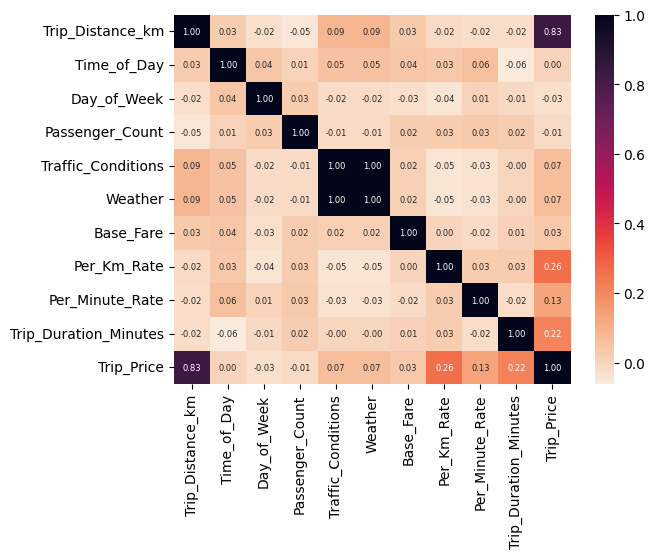

In [15]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True, cmap='rocket_r', fmt='.2f', annot_kws={"size": 6})

Text(0.5, 1.0, 'Histogram of The Taxi Fare Distribution')

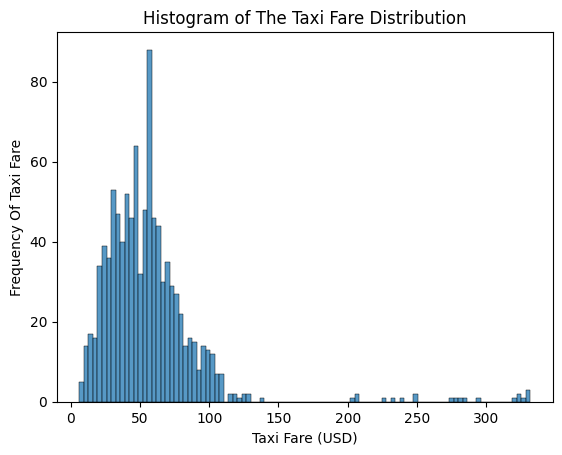

In [23]:
import matplotlib.pyplot as plt
sns.histplot(x=df["Trip_Price"], bins = 100)
plt.xlabel("Taxi Fare (USD)")
plt.ylabel("Frequency Of Taxi Fare")
plt.title("Histogram of The Taxi Fare Distribution")